In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [157]:
iris = pd.read_csv('Iris.csv')

In [158]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [159]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [160]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


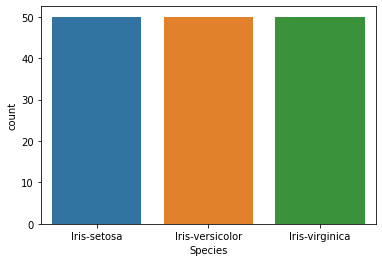

In [161]:
sns.countplot(x="Species",data=iris)

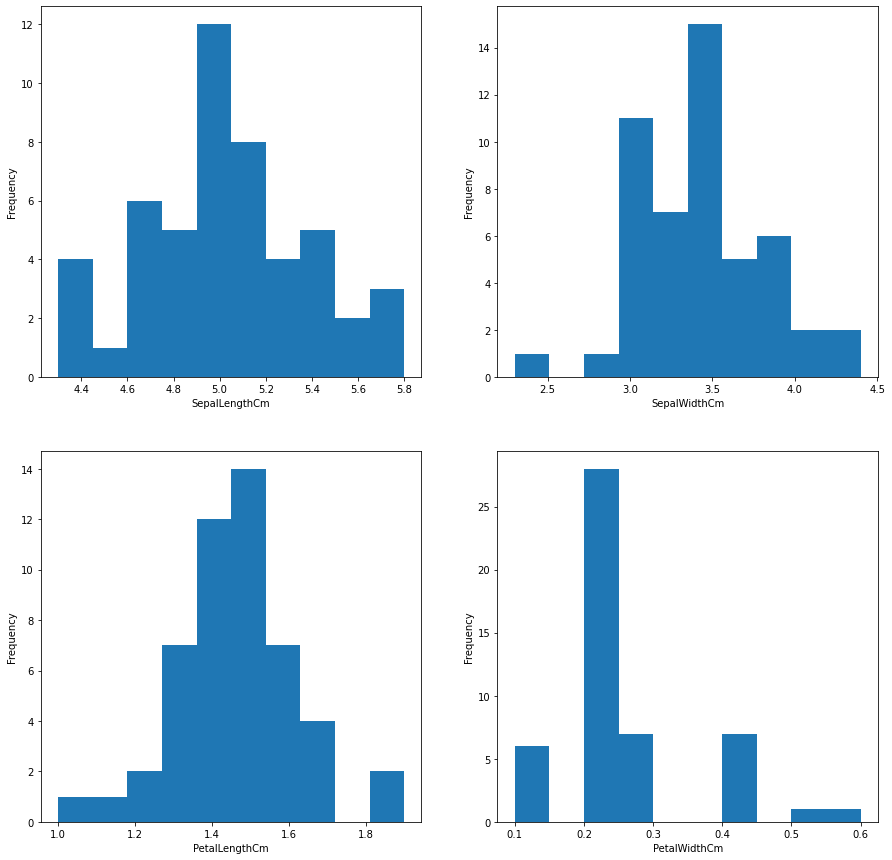

In [162]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,15))
for ax,label in zip(axes.flat,iris.columns[1:-1]):
    ax.set(xlabel=label)
iris[iris["Species"]=='Iris-setosa']["SepalLengthCm"].plot.hist(ax=axes[0,0],label="Teste")
iris[iris["Species"]=='Iris-setosa']["SepalWidthCm"].plot.hist(ax=axes[0,1])
iris[iris["Species"]=='Iris-setosa']["PetalLengthCm"].plot.hist(ax=axes[1,0])
iris[iris["Species"]=='Iris-setosa']["PetalWidthCm"].plot.hist(ax=axes[1,1])

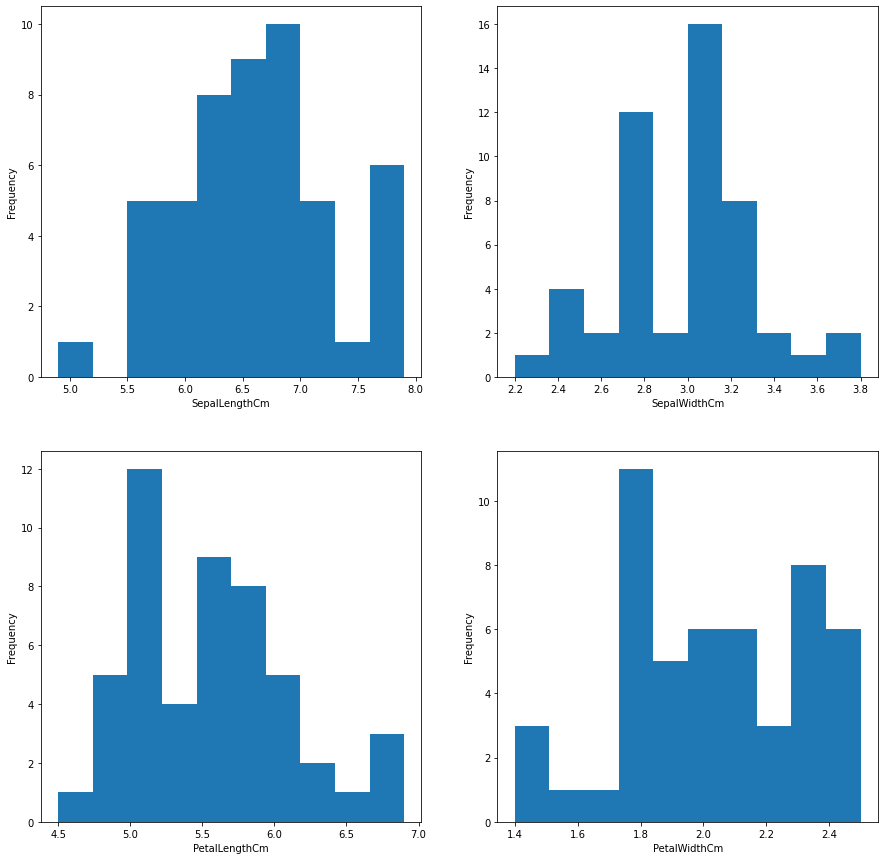

In [163]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,15))
for ax,label in zip(axes.flat,iris.columns[1:-1]):
    ax.set(xlabel=label)

iris[iris["Species"]=='Iris-virginica']["SepalLengthCm"].plot.hist(ax=axes[0,0],label="Teste")
iris[iris["Species"]=='Iris-virginica']["SepalWidthCm"].plot.hist(ax=axes[0,1])
iris[iris["Species"]=='Iris-virginica']["PetalLengthCm"].plot.hist(ax=axes[1,0])
iris[iris["Species"]=='Iris-virginica']["PetalWidthCm"].plot.hist(ax=axes[1,1])

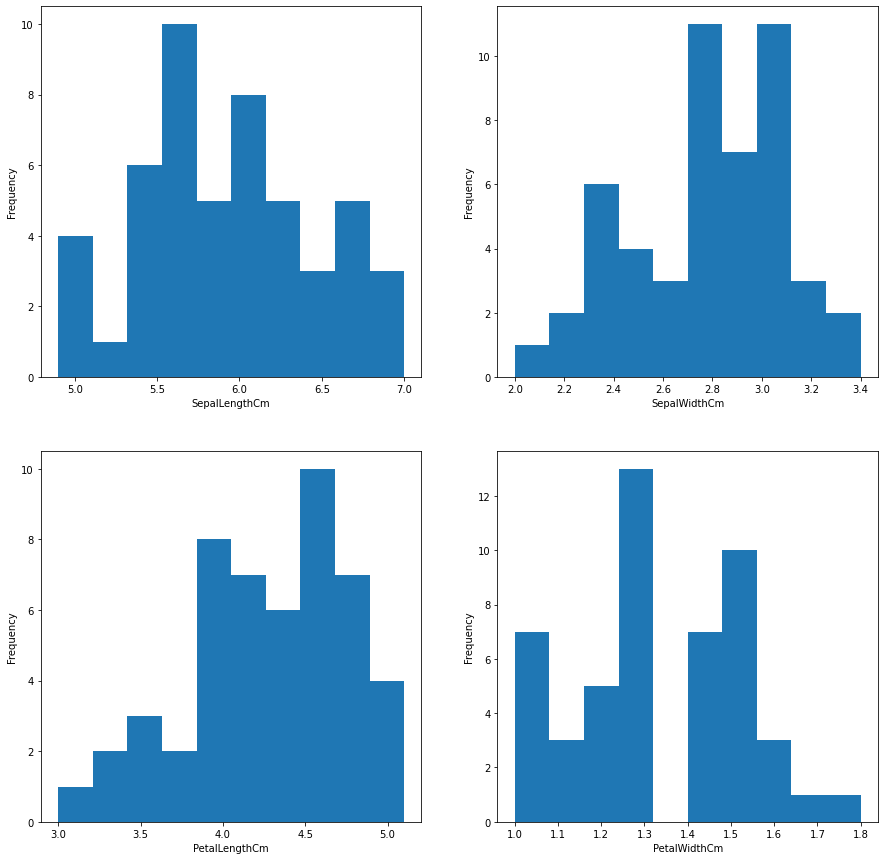

In [164]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,15))
for ax,label in zip(axes.flat,iris.columns[1:-1]):
    ax.set(xlabel=label)
iris[iris["Species"]=='Iris-versicolor']["SepalLengthCm"].plot.hist(ax=axes[0,0],label="Teste")
iris[iris["Species"]=='Iris-versicolor']["SepalWidthCm"].plot.hist(ax=axes[0,1])
iris[iris["Species"]=='Iris-versicolor']["PetalLengthCm"].plot.hist(ax=axes[1,0])
iris[iris["Species"]=='Iris-versicolor']["PetalWidthCm"].plot.hist(ax=axes[1,1])

In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
scalar = StandardScaler()

In [167]:
scalar_isis = scalar.fit_transform(iris.drop(["Id","Species"],axis=1))

In [168]:
scalar_isis = pd.DataFrame(scalar_isis,columns=iris.columns[1:-1])

In [169]:
scalar_isis.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [170]:
from sklearn.model_selection import train_test_split

In [171]:
X_train,X_test,y_train,y_test = train_test_split(scalar_isis,iris['Species'],test_size=30)

In [172]:
from sklearn.neighbors import KNeighborsClassifier

In [173]:
KNN =KNeighborsClassifier(n_neighbors=3)

In [174]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [175]:
prediction = KNN.predict(X_test)

In [176]:
from sklearn.metrics import classification_report

In [177]:
print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.91      0.95        11
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.86      0.86      0.86         7

       accuracy                           0.90        30
      macro avg       0.90      0.89      0.90        30
   weighted avg       0.91      0.90      0.90        30



30